# Bay Area Decision Sciences Summit
This notebook serves to simply explore the given data and is distinct from our scripts that will define our alphas for options trading optimization. 

## Libraries & Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [3]:
df = pd.read_csv("../data/BADSS training data.csv")
df.head()

,Date,Symbol,Maturity,Strike,Bid Price,Bid Size,Ask Price,Ask Size,Undl Price
0,4/11/2024,SPY,4/12/2024,518.0,1.74,13,1.76,592,518.0
1,4/11/2024,SPY,4/12/2024,519.0,1.24,54,1.25,1619,518.0
2,4/11/2024,SPY,4/12/2024,520.0,0.84,94,0.85,2646,518.0
3,4/11/2024,SPY,4/12/2024,521.0,0.54,479,0.55,3311,518.0
4,4/11/2024,SPY,4/12/2024,522.0,0.33,1207,0.34,3614,518.0


In [4]:
df.describe()

,Strike,Bid Price,Bid Size,Ask Price,Ask Size,Undl Price
count,25438.000000,25438.000000,25438.000000,25438.000000,25438.000000,25438.000000
mean,432.675752,0.601874,1558.134562,0.646155,4413.116754,404.632690
std,114.801944,1.204770,2108.440647,1.243463,5186.069358,110.127146
min,193.000000,0.000000,0.000000,0.010000,3.000000,192.840000
25%,433.000000,0.000000,0.000000,0.010000,1147.000000,418.820000
50%,469.000000,0.020000,692.500000,0.050000,2856.000000,431.100000
75%,512.000000,0.550000,2320.750000,0.610000,6066.500000,499.720000
max,615.000000,9.070000,18282.000000,9.990000,70576.000000,520.840000


## Time-Series Analysis

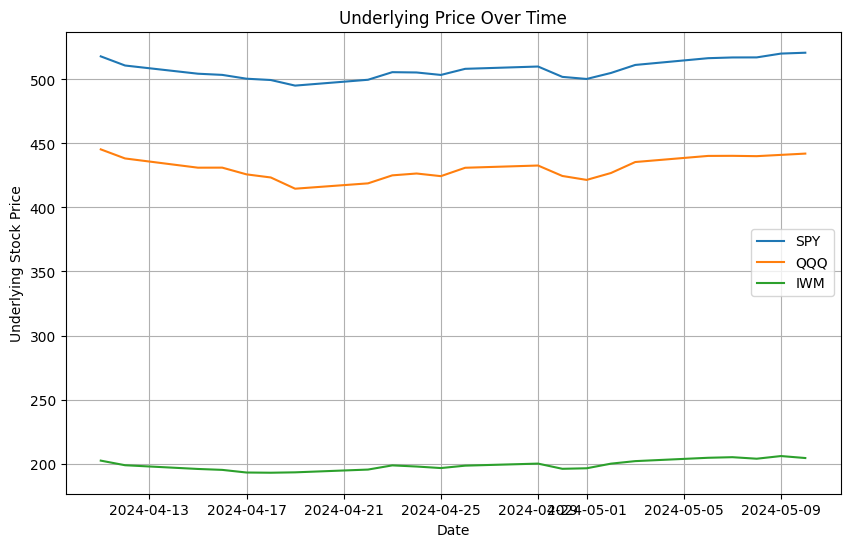

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Maturity'] = pd.to_datetime(df['Maturity'])
df = df.sort_values(by='Date')

# Plot undl price over time
plt.figure(figsize=(10, 6))
for symbol in df.Symbol.unique():
    subset = df[df.Symbol == symbol]
    plt.plot(subset['Date'], subset['Undl Price'], label=symbol)

plt.legend()
plt.grid()
plt.title('Underlying Price Over Time')
plt.xlabel('Date')
plt.ylabel('Underlying Stock Price')
plt.show()

- SPY (blue) and QQQ (orange) show similar trends, with an initial decline followed by a recovery.
- IWM (green) has a lower absolute price and less volatility compared to SPY and QQQ.
- QQQ experienced a sharper mid-period dip, suggesting higher sensitivity to market conditions.
- SPY remained the most stable, reinforcing its role as a benchmark index.
- General upward trend towards the end across all indices, indicating market recovery.

/tmp/ipykernel_49552/2794113062.py:6: FutureWarning: The provided callable <function mean at 0x7f4c1c0bcf40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  subset = subset.groupby('Date').agg({'Bid Price': np.mean}).reset_index()
/tmp/ipykernel_49552/2794113062.py:6: FutureWarning: The provided callable <function mean at 0x7f4c1c0bcf40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  subset = subset.groupby('Date').agg({'Bid Price': np.mean}).reset_index()
/tmp/ipykernel_49552/2794113062.py:6: FutureWarning: The provided callable <function mean at 0x7f4c1c0bcf40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sub

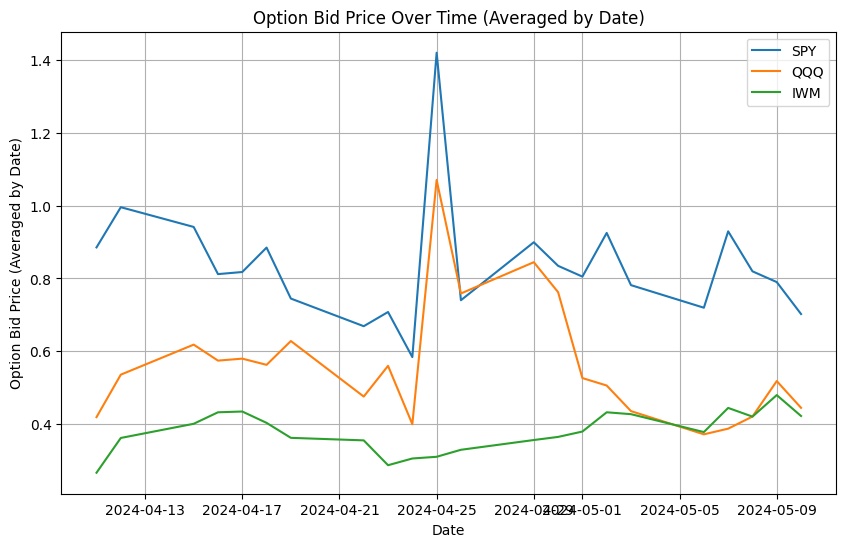

In [6]:
# Plot Option Bid Price Over Time
plt.figure(figsize=(10, 6))
for symbol in df.Symbol.unique():
    subset = df[df.Symbol == symbol]
    # average bid price for each date
    subset = subset.groupby('Date').agg({'Bid Price': np.mean}).reset_index()
    plt.plot(subset['Date'], subset['Bid Price'], label=symbol)

plt.legend()
plt.grid()
plt.title('Option Bid Price Over Time (Averaged by Date)')
plt.xlabel('Date')
plt.ylabel('Option Bid Price (Averaged by Date)')
plt.show()

- SPY (blue) has the highest average bid prices, followed by QQQ (orange) and IWM (green), suggesting more demand/liquidity for SPY options.
- Sharp spike on April 25 across all three symbols indicates a possible market event or volatility surge.
- QQQ's bid prices decline significantly after April 30, implying reduced demand or lower volatility.
- IWM's bid prices are the most stable, with a slight upward trend toward the end.
- SPY and QQQ exhibit more fluctuations, possibly due to higher market sensitivity.

/tmp/ipykernel_49552/162701637.py:6: FutureWarning: The provided callable <function mean at 0x7f4c1c0bcf40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  subset = subset.groupby('Date').agg({'Ask Price': np.mean}).reset_index()
/tmp/ipykernel_49552/162701637.py:6: FutureWarning: The provided callable <function mean at 0x7f4c1c0bcf40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  subset = subset.groupby('Date').agg({'Ask Price': np.mean}).reset_index()
/tmp/ipykernel_49552/162701637.py:6: FutureWarning: The provided callable <function mean at 0x7f4c1c0bcf40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  subset

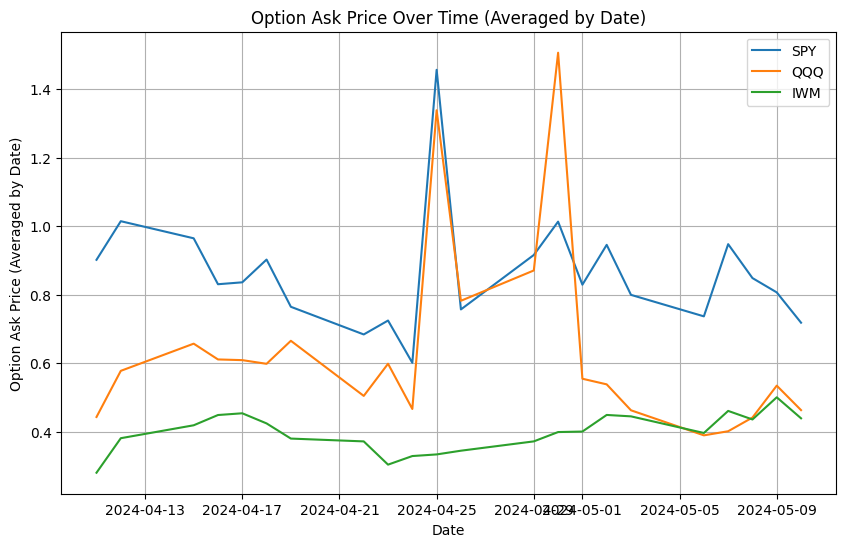

In [7]:
# we do the same for the ask price
plt.figure(figsize=(10, 6))
for symbol in df.Symbol.unique():
    subset = df[df.Symbol == symbol]
    # average ask price for each date
    subset = subset.groupby('Date').agg({'Ask Price': np.mean}).reset_index()
    plt.plot(subset['Date'], subset['Ask Price'], label=symbol)

plt.legend()
plt.grid()
plt.title('Option Ask Price Over Time (Averaged by Date)')
plt.xlabel('Date')
plt.ylabel('Option Ask Price (Averaged by Date)')
plt.show()

- Ask prices closely follow bid prices, confirming market consistency.
- Sharp spikes on April 25 (SPY, QQQ) and April 30 (QQQ only) suggest market volatility or liquidity shifts.
- QQQ’s ask price surge on April 30 is much more pronounced than its bid price spike, possibly due to wider spreads or lower liquidity.
- SPY and IWM are more stable, with SPY consistently having the highest ask prices.
- IWM shows a gradual increase in ask prices, suggesting growing demand or higher risk pricing.

## Distribution and Density Plots

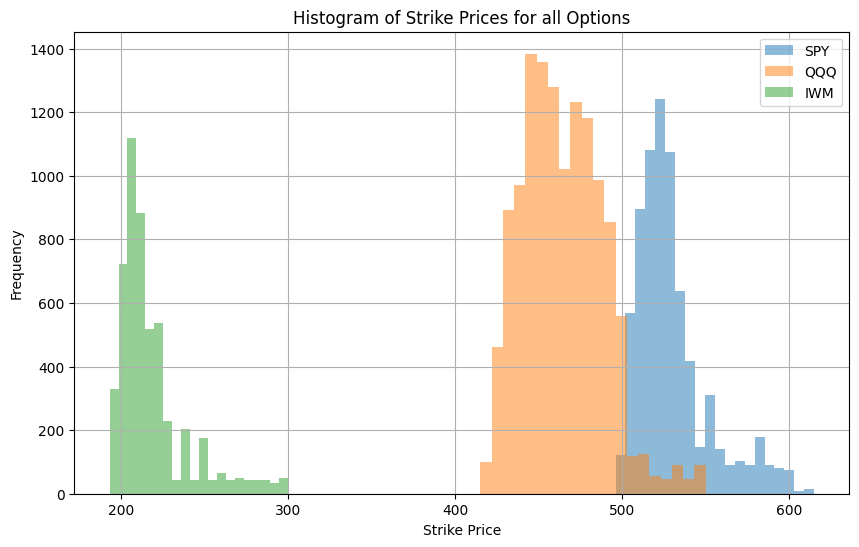

In [8]:
# Plot histogram of Strike Prices for all options
plt.figure(figsize=(10, 6))

for symbol in df.Symbol.unique():
    subset = df[df.Symbol == symbol]
    plt.hist(subset['Strike'], bins=20, alpha=0.5, label=symbol)

plt.legend()
plt.grid()
plt.title('Histogram of Strike Prices for all Options')
plt.xlabel('Strike Price')
plt.ylabel('Frequency')
plt.show()

- Distinct clustering for each symbol:
    - SPY (blue) strike prices are centered around 500-550.
    - QQQ (orange) strike prices are mostly between 400-470.
    - IWM (green) strike prices are much lower, primarily 180-220.

- Most strike prices are concentrated near-the-money (close to the underlying price range seen in the earlier time-series plot).

- SPY and QQQ have a wider distribution of strikes, suggesting more diverse option trading strategies.
- IWM has a more condensed range, indicating fewer strike price variations, possibly due to lower volatility or liquidity.

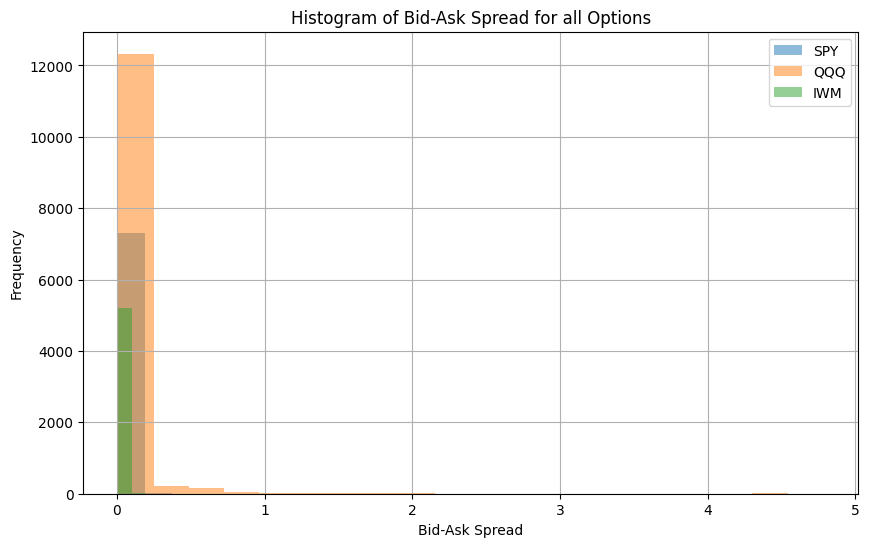

In [9]:
# let's look at bid-ask spread with histogram
df['Spread'] = df['Ask Price'] - df['Bid Price']

plt.figure(figsize=(10, 6))
for symbol in df.Symbol.unique():
    subset = df[df.Symbol == symbol]
    plt.hist(subset['Spread'], bins=20, alpha=0.5, label=symbol)

plt.legend()
plt.grid()
plt.title('Histogram of Bid-Ask Spread for all Options')
plt.xlabel('Bid-Ask Spread')
plt.ylabel('Frequency')
plt.show()

- Most bid-ask spreads are very small (~0 to 0.2), indicating high liquidity in the majority of option contracts.
- QQQ (orange) has the highest frequency of low bid-ask spreads, but also shows some extreme values, aligning with earlier observed volatility spikes.
- SPY (blue) and IWM (green) exhibit consistently tight spreads, reinforcing their status as more liquid instruments.
- A few extreme outliers exist (~2-5 spread range), likely due to low-liquidity contracts or sudden volatility surges.
- Tight spreads overall suggest that most options in the dataset are frequently traded, reducing execution costs.

## Option Market Liquidity Analysis

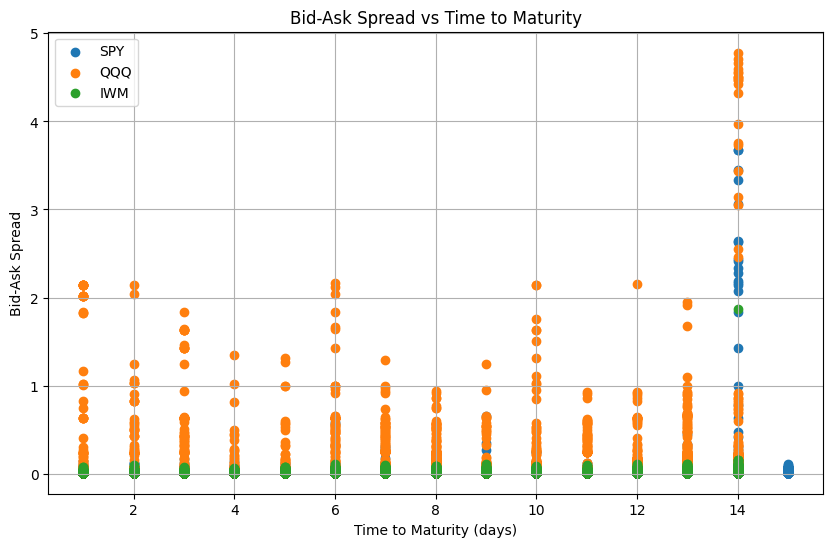

In [10]:
# Bid-Ask Spread vs Time To Maturity Scatter Plot
# calculate time to maturity
df['Time to Maturity'] = (df['Maturity'] - df['Date']).dt.days

plt.figure(figsize=(10, 6))
for symbol in df.Symbol.unique():
    subset = df[df.Symbol == symbol]
    plt.scatter(subset['Time to Maturity'], subset['Spread'], label=symbol)

plt.legend()
plt.grid()
plt.title('Bid-Ask Spread vs Time to Maturity')
plt.xlabel('Time to Maturity (days)')
plt.ylabel('Bid-Ask Spread')
plt.show()

- Bid-ask spreads tend to increase as time to maturity increases, especially at 14 days where spreads are significantly wider.
- QQQ (orange) has the highest spreads across all maturities, suggesting lower liquidity or higher volatility compared to SPY and IWM.
- IWM (green) consistently has the tightest spreads, making it the most liquid option set.
- SPY (blue) remains stable but shows slight spread increases near 14 days, indicating that longer-dated options for SPY might have some liquidity constraints.
- Near-term options (1-5 days) have the smallest bid-ask spreads, reinforcing that shorter-term options are generally more liquid and cost-effective for trading.

## Option Payoff & Exposure

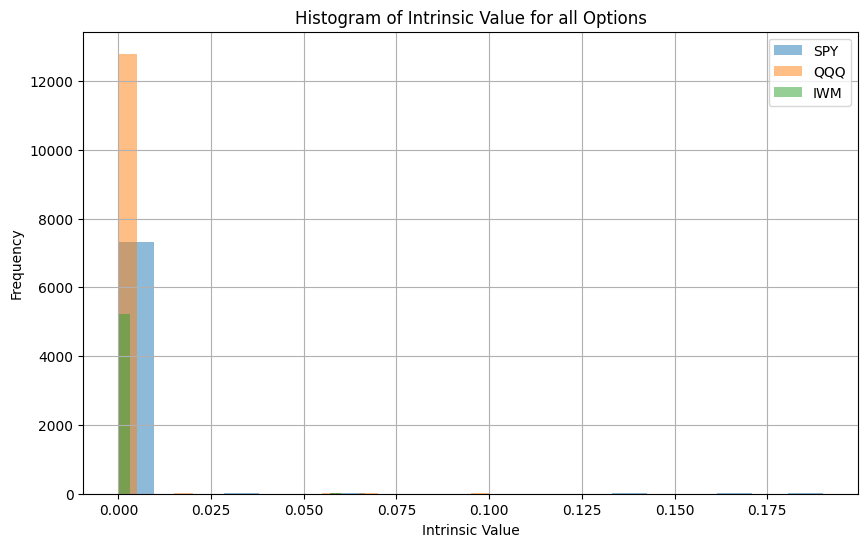

In [11]:
# histogram of max(Undl Price - Strike, 0) for all options
df['Intrinsic Value'] = df['Undl Price'] - df['Strike']
df['Intrinsic Value'] = df['Intrinsic Value'].clip(lower=0)

plt.figure(figsize=(10, 6))
for symbol in df.Symbol.unique():
    subset = df[df.Symbol == symbol]
    plt.hist(subset['Intrinsic Value'], bins=20, alpha=0.5, label=symbol)

plt.legend()
plt.grid()
plt.title('Histogram of Intrinsic Value for all Options')
plt.xlabel('Intrinsic Value')
plt.ylabel('Frequency')
plt.show()

- Most options have an intrinsic value of zero, meaning they are out-of-the-money (OTM).
- Very few options have positive intrinsic value, indicating that in-the-money (ITM) options are rare in the dataset.
- QQQ (orange) has the highest frequency of OTM options, followed by SPY (blue) and IWM (green).
- Intrinsic values are concentrated near zero, suggesting that most options being traded are speculative bets rather than deep ITM contracts.
- Higher intrinsic values exist but are very sparse, reinforcing that traders might be more focused on leveraged plays (OTM options) rather than intrinsic value-driven positions.

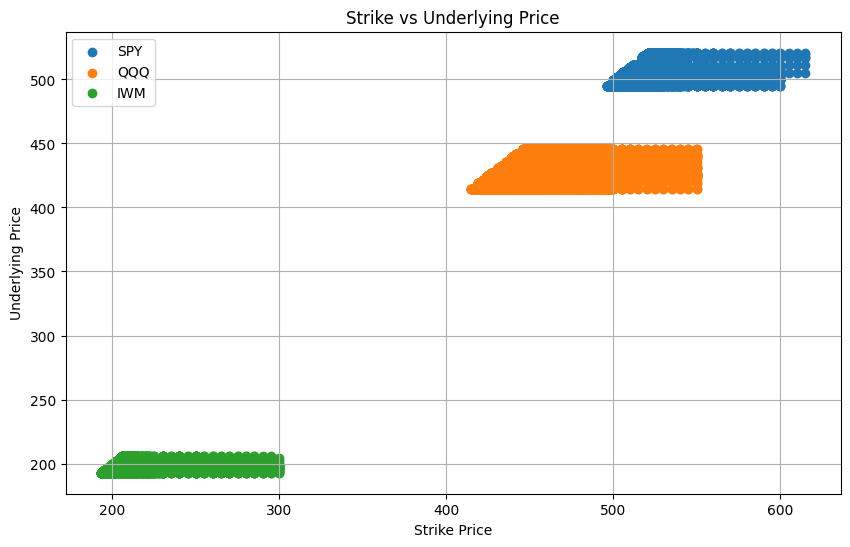

In [12]:
# expected exposure -> scatter plot of strike vs Undl Price
plt.figure(figsize=(10, 6))
for symbol in df.Symbol.unique():
    subset = df[df.Symbol == symbol]
    plt.scatter(subset['Strike'], subset['Undl Price'], label=symbol)

plt.legend()
plt.grid()
plt.title('Strike vs Underlying Price')
plt.xlabel('Strike Price')
plt.ylabel('Underlying Price')
plt.show()

- Most options are near-the-money (strike price close to the underlying price) across SPY, QQQ, and IWM.
- Clear clustering per asset:
    - SPY (blue) has strikes around 500-550, aligning with its underlying price range.
    - QQQ (orange) has strikes around 400-450, matching its price levels.
    - IWM (green) has strikes between 190-220, closely tracking its price.
- Options tend to be structured in tight bands, meaning most strike prices are logically spaced around underlying prices rather than widely dispersed.
- Minimal deep in-the-money (ITM) or far out-of-the-money (OTM) strikes, which aligns with traders mostly focusing on near-the-money contracts.

## Correlation Analysis

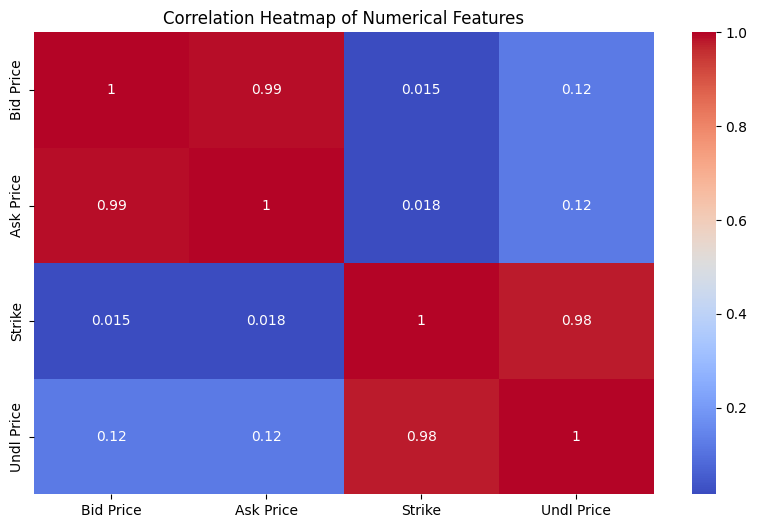

In [13]:
# Heatmap of numerical features Bid price, ask price, strike and underlying price
numerical_features = ['Bid Price', 'Ask Price', 'Strike', 'Undl Price']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- Strong correlation (0.99) between Bid Price and Ask Price, indicating tight spreads in most cases.
- Very high correlation (0.98) between Strike Price and Underlying Price, suggesting most options are near-the-money.
- Weak correlation (~0.12) between Bid/Ask Prices and Underlying Price, meaning option prices do not move in a simple linear fashion with the stock price.
- Minimal correlation (~0.015) between Strike Price and Bid/Ask Prices, likely due to the variety of option maturities and volatilities affecting pricing.

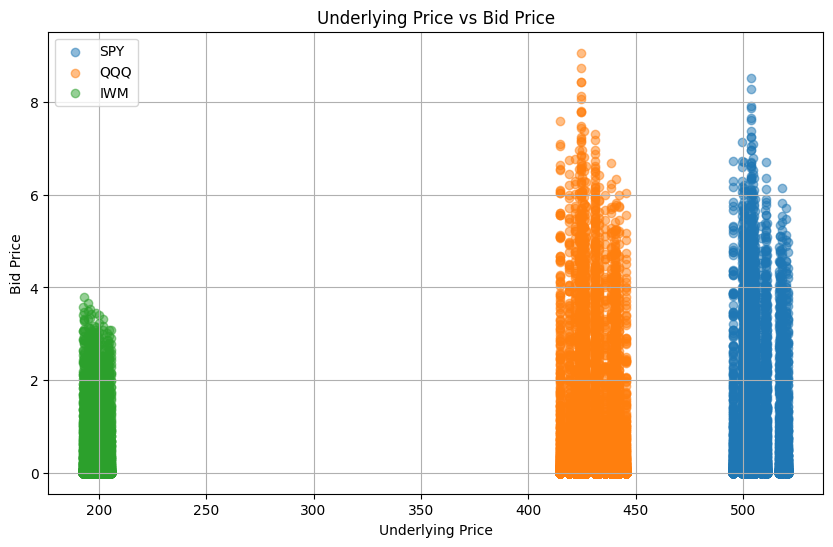

In [14]:
# Volatility impact on prices scatters plots of bid price and ask price vs underlying price
plt.figure(figsize=(10, 6))

for symbol in df.Symbol.unique():
    subset = df[df.Symbol == symbol]
    plt.scatter(subset['Undl Price'], subset['Bid Price'], label=symbol, alpha=0.5)

plt.legend()
plt.grid()
plt.title('Underlying Price vs Bid Price')
plt.xlabel('Underlying Price')
plt.ylabel('Bid Price')
plt.show()

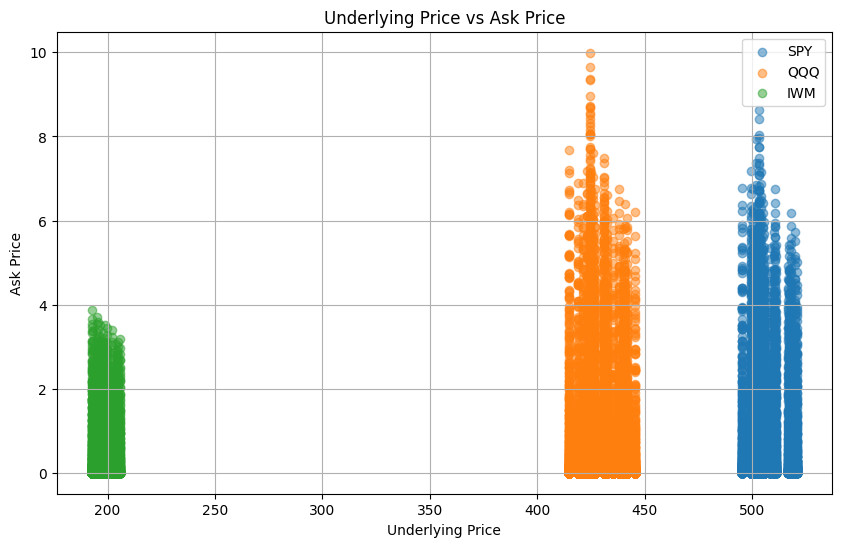

In [15]:
plt.figure(figsize=(10, 6))

for symbol in df.Symbol.unique():
    subset = df[df.Symbol == symbol]
    plt.scatter(subset['Undl Price'], subset['Ask Price'], label=symbol, alpha=0.5)

plt.legend()
plt.grid()
plt.title('Underlying Price vs Ask Price')
plt.xlabel('Underlying Price')
plt.ylabel('Ask Price')
plt.show()    

- Bid and Ask Prices increase as the underlying price increases, showing a strong relationship between option pricing and stock price movement.
- SPY (blue) and QQQ (orange) have a broader range of bid/ask prices, indicating more variation in option demand and pricing.
- QQQ options have the highest bid/ask prices at the upper end, possibly due to higher implied volatility or liquidity constraints.
- IWM (green) options exhibit lower bid/ask prices with less variation, reinforcing that these options are generally less volatile and more liquid.
- Ask prices are consistently higher than bid prices, as expected, with spreads widening slightly at higher underlying price levels.

## So What's The Game Plan?
Based on our exploratory data analysis (EDA), we now have a clear understanding of the market behavior for SPY, QQQ, and IWM options. Our goal is to design an optimization and trading strategy that ensures a minimum exposure of +$10M while minimizing option premium costs.

1. Strategy Design:
    - Prioritize Short-Term Options
        - Bid-ask spreads are narrower for near-term options (1-5 days), meaning they are cheaper to enter and exit.
        - Holding longer-term options increases transaction costs.


    - Focus on SPY and IWM for Liquidity
        - SPY has lower bid-ask spreads and is more stable, making it a safe bet for hedging.
        - IWM has the lowest bid-ask spreads, reducing transaction costs.
        - QQQ has high spreads and volatile pricing, making it riskier. Use it selectively for high-exposure trades.

    - Balance ITM vs. OTM Option Selection
        - Most options in the dataset are OTM, meaning they have a low probability of expiring profitably.
        - Instead of buying deep ITM options (high cost) or far OTM options (low probability of payoff), we should focus on near-the-money (NTM) options for a cost-effective balance.

2. Optimization Approach:
    - Define Constraints:
        - Daily exposure must be at least $10M using intrinsic value calculations.
        - Minimize total premium cost over the full trading period.
        - Avoid negative exposure in any market scenario.

    - Mathematical Formulation:
        - Define decision variables as the number of contracts to buy per option.
        - Set up an objective function to minimize premium costs while satisfying the exposure constraint.
        - Use Linear Programming (LP) or Mixed-Integer Programming (MIP) to find the best combination of contracts.
        - Implement Monte Carlo Simulations to test strategy robustness across different price paths.

3. Execution Plan:
    - Step 1: Data Preprocessing
        - Clean and filter options based on liquidity (bid size, ask size) and reasonable spreads.
        - Compute expected exposure for different market moves.

    - Step 2: Model Training (Optimization Algorithm Development)
        - Implement LP/MIP to optimize contract selection for each day.
        - Test model on training data to ensure it meets the $10M exposure threshold at minimum cost.
        - Tune parameters and compare simple heuristic rules (e.g., fixed contract purchases) vs. optimization results.

    - Step 3: Final Testing & Model Validation
        - Apply model to test data on event day.
        - Adjust dynamically based on real-time results.
        - Present final results, showing:
            - Total cost over the month
            - Daily exposure validation
            - Comparison of optimized strategy vs. naive approaches